<IPython.core.display.Javascript object>


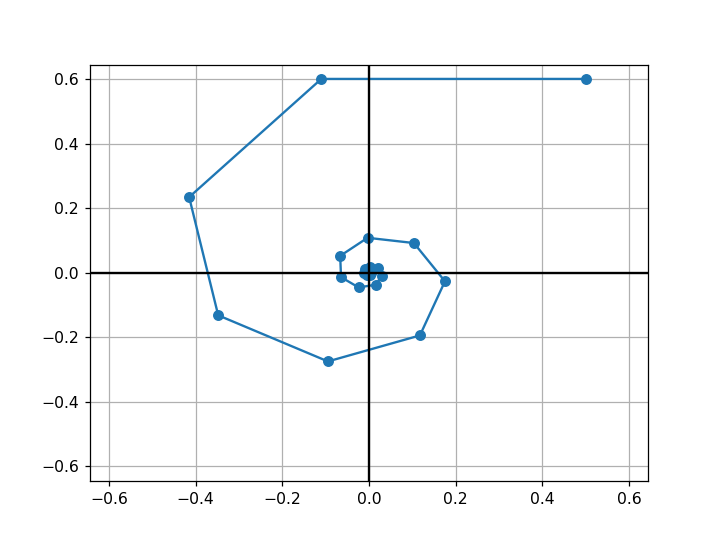

Text(value='0.5+0.6j', description='Number:')

Dropdown(description='Draw mode:', index=2, options=(('No lines', <DrawOpt.NO_LINES: 'No lines'>), ('Lines from origin', <DrawOpt.O_LINES: 'Lines from origin'>), ('Lines between points', <DrawOpt.C_LINES: 'Lines between points'>)), value=<DrawOpt.C_LINES: 'Lines between points'>)

Button(description='Go!', style=ButtonStyle())

Button(description='Repeat 50 times', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

In [8]:
%matplotlib notebook  

from enum import Enum
from ipywidgets import widgets
from IPython.display import display
from numpy import array
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


class DrawOpt(Enum):
    NO_LINES="No lines"
    O_LINES = "Lines from origin"
    C_LINES = "Lines between points"


drawopt = DrawOpt.C_LINES
    
text = widgets.Text(description="Number:", value="0.5+0.6j")
button = widgets.Button(description="Go!")
res_button = widgets.Button(description="Reset")
repeat_button = widgets.Button(description="Repeat 50 times")


def even_limits(cur):
    new = max(map(abs, cur))
    return (-new, new)


def redraw():
    ax.cla()
   # ax.autoscale()
    ax.set_aspect('auto')
    ax.grid(True, which='both')
    
    if drawopt == DrawOpt.O_LINES:
        for p in points[1:]:
            arr = array([0,p])
            ax.plot(arr.real, arr.imag, marker='o')
    elif drawopt == DrawOpt.NO_LINES:
         arr = array(points[1:])
         ax.scatter(arr.real, arr.imag)
    elif drawopt == DrawOpt.C_LINES:
         arr = array(points[1:])
         ax.plot(arr.real, arr.imag, marker='o')
            
    
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # center origin and maintain aspect ratio 1:1
    new_limits = even_limits(ax.get_xbound() + ax.get_ybound())
    ax.set_xbound(even_limits(new_limits))
    ax.set_ybound(even_limits(new_limits))


def add_point():
    points.append(points[-1] * complex(text.value))
    
def clicked(b):
    add_point()
    redraw()

def res_clicked(b):
    global points
    points=[1]
    redraw()

        
button.on_click(clicked)
repeat_button.on_click(repeat_clicked)
res_button.on_click(res_clicked)

def repeat_clicked(b):
    for i in range(50):
        add_point()
    redraw()



combo_drawopts=widgets.Dropdown(
    options=list(map(lambda x: (x.value,x), [DrawOpt.NO_LINES, DrawOpt.O_LINES, DrawOpt.C_LINES])),
    value=drawopt,
    description='Draw mode:',
    disabled=False,
)


def on_opt_change(change):
    global drawopt
    if change['type'] == 'change' and change['name'] == 'value':
        drawopt = change['new']
        redraw()

combo_drawopts.observe(on_opt_change)




# init array
points = [1]

fig, ax = plt.subplots()
redraw()


display(text)
display(combo_drawopts)
display(button)
display(repeat_button)
display(res_button)


1;

